In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from src.tdse_solver import *

a = 10
b = 2*np.pi / a
v0 = 0.05
nkpts = 120
nbnds = 5
k0 = np.linspace(-0.5, 0.5, nkpts, endpoint=True)

deep_red = '#C44E52'
dark_red = '#8B0000'
deep_blue = '#4C72B0'
deep_green = '#55A868'

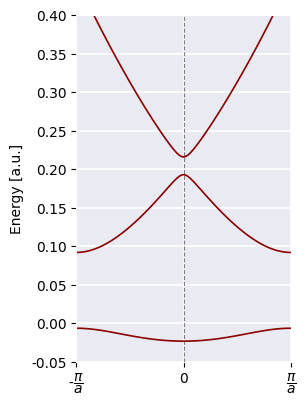

In [4]:
plt.style.use('default')
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(3.0, 4.0))
ax = plt.subplot()
ax.set_facecolor('#EAEAF2')
ax.grid(True, color='white', linewidth=1.2, linestyle='-')
ax.set_axisbelow(True)

for spine in ax.spines.values():
    spine.set_color('white')

Enk = np.array([
    epsilon_nk_cosx_pot(k, a, v0, nbnds=nbnds, Ngmax=1)[0]
    for k in k0
])

ax.axvline(x=0, color='gray', ls='--', lw=0.8)

for ii in range(Enk.shape[1]): 
    ax.plot(k0, Enk[:,ii], color=dark_red, lw=1.2)

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-v0, 0.4)
ax.set_xticks([-0.5, 0, 0.5])
ax.set_xticklabels([r'-$\dfrac{\pi}{a}$', r'$0$', r'$\dfrac{\pi}{a}$'])
ax.set_ylabel('Energy [a.u.]', labelpad=5)

plt.tight_layout(pad=0.5)
plt.show()

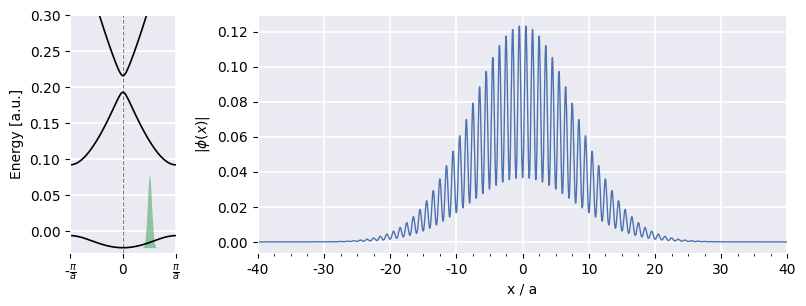

In [5]:
n0       = 0
k0       = 0.25
sigma_k  = 0.02
ngx      = 20
kwp, fk  = get_bloch_wavepacket_gaussian_envelop(k0, sigma_k=sigma_k,
        nk=100, Nsigma=10)

k_1d_bz = np.linspace(-0.5, 0.5, 120)
Enk = np.array([
    epsilon_nk_cosx_pot(k, a=a, v0=v0, ngx=ngx, nbnds=nbnds, Ngmax=1)[0]
    for k in k_1d_bz
])

Nc       = 160
L        = Nc * a
Nx       = 3999
x        = np.linspace(-L/2, L/2, Nx)
dx       = x[1] - x[0]
bloch_wp = construct_blochwp_cosx_pot(x, kwp, fk, a=a, v0=v0, nbnds=nbnds, ngx=20)

mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8.0, 3.0))

axes = fig.subplot_mosaic(
    [[0, 1]],
    empty_sentinel=None,
    height_ratios=[1],
    width_ratios=[1, 5],
)
axes_list = [axes[ii] for ii in range(2)]

for ax in axes_list:
    ax.set_facecolor('#EAEAF2')
    ax.grid(True, color='white', linewidth=1.2, linestyle='-')
    ax.set_axisbelow(True)
    for spine in ax.spines.values():
        spine.set_color('white')

ax = axes_list[0]
ax.axvline(x=0, lw=0.8, ls='--', color='gray')

emin = Enk.min()

ax.fill_between(
    kwp, emin, fk * np.sqrt( np.sqrt(np.pi) * sigma_k) * 0.1 + emin,
    lw=0.0, color=deep_green, alpha=0.6
)

for ii in range(nbnds):
    ax.plot(k_1d_bz, Enk[:,ii], color='black', lw=1.2)

ax.set_xlim(-0.5, 0.5)
ax.set_xticks([-0.5, 0, 0.5], [r'-$\frac{\pi}{a}$', '0',  r'$\frac{\pi}{a}$'])
ax.set_ylim(-0.03, 0.30)
ax.set_ylabel('Energy [a.u.]')

ax = axes_list[1]
ax.plot(x / a, np.abs(bloch_wp), color=deep_blue, lw=1.0)

ax.xaxis.set_minor_locator(AutoMinorLocator(n=4))
ax.set_xlim(-40, 40)
ax.set_ylabel(r'|$\phi(x)|$')
ax.set_xlabel(r'x / a')

plt.tight_layout(pad=0.5, w_pad=1.0)
plt.show()